In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from collections import Counter
from mne import filter
import pandas as pd

In [14]:
SAMPLE_FREQ = 250

def prepare_data(filename, float_mean = 5):
    ft_mean_samples = int(float_mean * SAMPLE_FREQ)
    data = np.fromfile(filename, dtype = 'float32')
    #print(data)
    data = data.reshape(-1,17)
    eeg = data[:,:8]
    #print(eeg.shape)
    means = np.array([np.mean(eeg[i:ft_mean_samples+i], axis=0) for i in range(len(eeg) - ft_mean_samples)])
    eeg = eeg[ft_mean_samples:]-means
    for i in range(eeg.shape[1]):
        eeg[:,i] = filter.notch_filter(x=eeg[:, i].astype(np.float64), Fs=SAMPLE_FREQ, freqs=[50], trans_bandwidth=2)
        b, a = signal.butter(5, np.array([0.5, 30]) / (0.5 * SAMPLE_FREQ), btype='band')
        eeg[:, i] = signal.lfilter(b, a, eeg[:, i])
    #print(eeg)
    return eeg

def show_data(eeg):
    plt.figure(figsize=(12, 5)), plt.grid()
    for i in range(eeg.shape[1]):
        plt.plot(eeg[:, i], label=str(i + 1))
    plt.legend(), plt.ylim([-150, 150])

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 48.88
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Upper passband edge: 51.12 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 51.62 Hz)
- Filter length: 825 samples (3.300 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 48.88
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 48.38 Hz)
- Upper passband edge: 51.12 Hz
- Upper transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 51.62 Hz

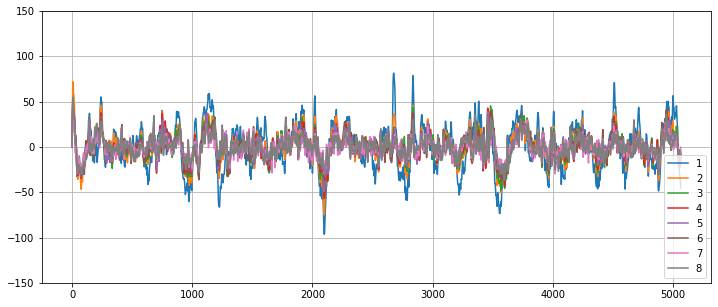

In [16]:
df = prepare_data('..\\Reference Project\\data_samples\\blinking\\left.bin')
show_data(df)

Dataset has 17 columns.

3 Acceleration.
3 Gyroscope.
1 Battery.
1 count.
1 val IO.
8 EEG.

That is why we select the last columns because we want only EEG ka data